# CLINT WP5: DEBUG why is tmax anomaly almost always negative?
### 2023/10/18 - ongoing

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4 as nc
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy
import importlib
import seaborn as sns
#from mpl_toolkits import Basemap
import CLINT001_functions as clint

In [2]:
modeldir = '~/Documents/CMCC-GoogleDrive/CMCC-CM2-SR5/'
obsdir = modeldir
maskdir = '~/Documents/CMCC-GoogleDrive/Mask_Clusters/Test3_Clusters/'
plotdir = '/Users/squintu/Documents/CMCC-GoogleDrive/plots_for_reports/'


In [59]:
y = 2019
mmb = 7

In [60]:
xrdf = xr.open_dataset(f'{modeldir}/CMCC-CM2-SR5-hist-r{mmb}_tmax_dailyanom_{y}_cropped.nc')

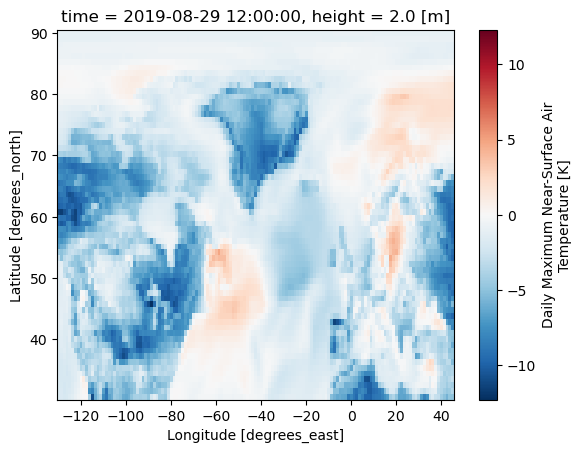

In [61]:
xrdf.isel(time = 240)['tasmax'].plot()


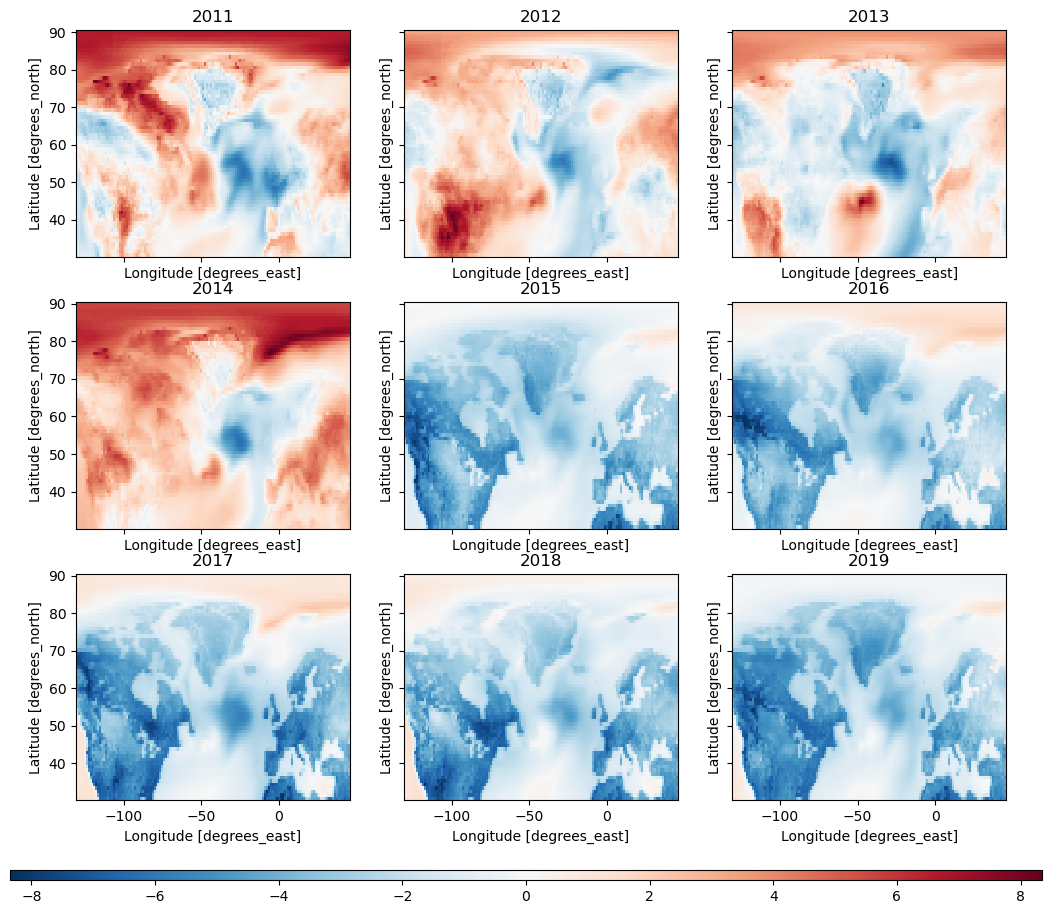

In [74]:
mmb = 3

fig, axs = plt.subplots(3, 3,sharey=True,sharex=True,figsize=(12,10))

axs = axs.flatten()


for f,y in enumerate(range(2011,2020)):
    axs[f] = plt.subplot(3, 3, f+1)
    axs[f].set_title(y)
    xrdf = xr.open_dataset(f'{modeldir}/CMCC-CM2-SR5-hist-r{mmb}_tmax_dailyanom_{y}_cropped.nc')
    xrmean = xrdf.mean(dim='time')
    cs = xrmean['tasmax'].plot(add_colorbar=False)
    plt.title(y)
cbar_ax = fig.add_axes([0.07, 0.03, 0.86,0.01])

cbar=fig.colorbar(cs, cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=10)
